In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
yellow_19_train = pd.read_csv('2019_Yellow_Taxi_Trip_Data_training.csv', nrows=100000)
yellow_19_test = pd.read_csv('2019_Yellow_Taxi_Trip_Data_test.csv', nrows=100000)

In [3]:
yellow_19_train = yellow_19_train[yellow_19_train['tpep_pickup_datetime'].notna()]
yellow_19_train = yellow_19_train[yellow_19_train['tpep_dropoff_datetime'].notna()]
yellow_19_train['tpep_pickup_datetime'] = pd.to_datetime(yellow_19_train['tpep_pickup_datetime'], errors='coerce')
yellow_19_train['tpep_dropoff_datetime'] = pd.to_datetime(yellow_19_train['tpep_dropoff_datetime'], errors='coerce')
yellow_19_train['trip_seconds'] = (yellow_19_train['tpep_dropoff_datetime'] - yellow_19_train['tpep_pickup_datetime']).dt.total_seconds()
yellow_19_train['month'] = yellow_19_train['tpep_dropoff_datetime'].dt.month
yellow_19_train = yellow_19_train[yellow_19_train['trip_distance'].notna()]
yellow_19_train = yellow_19_train[yellow_19_train['total_amount'].notna()]            
x = yellow_19_train[['trip_distance', 'trip_seconds', 'month']]
y = yellow_19_train['total_amount']

In [4]:
yellow_19_test = yellow_19_test[yellow_19_test['tpep_pickup_datetime'].notna()]
yellow_19_test = yellow_19_test[yellow_19_test['tpep_dropoff_datetime'].notna()]
yellow_19_test['tpep_pickup_datetime'] = pd.to_datetime(yellow_19_test['tpep_pickup_datetime'], errors='coerce')
yellow_19_test['tpep_dropoff_datetime'] = pd.to_datetime(yellow_19_test['tpep_dropoff_datetime'], errors='coerce')
yellow_19_test['trip_seconds'] = (yellow_19_test['tpep_dropoff_datetime'] - yellow_19_test['tpep_pickup_datetime']).dt.total_seconds()
yellow_19_test['month'] = yellow_19_test['tpep_dropoff_datetime'].dt.month
yellow_19_test = yellow_19_test[yellow_19_test['trip_distance'].notna()]
yellow_19_test = yellow_19_test[yellow_19_test['total_amount'].notna()]            
x_test = yellow_19_test[['trip_distance', 'trip_seconds', 'month']]
y_test = yellow_19_test['total_amount']

<h2> Hidden Layer, MSE, 32 Input, 64 Hidden </h2>

In [5]:
NN_model = Sequential()

NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x, y, epochs=100,verbose=2,validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 408.7773 - mae: 9.2594 - mse: 408.7773 - val_loss: 92.1452 - val_mae: 4.5092 - val_mse: 92.1452
Epoch 2/100
2500/2500 - 3s - loss: 80.2701 - mae: 3.9509 - mse: 80.2701 - val_loss: 66.3970 - val_mae: 3.1999 - val_mse: 66.3970
Epoch 3/100
2500/2500 - 3s - loss: 59.7573 - mae: 3.3129 - mse: 59.7573 - val_loss: 433.8837 - val_mae: 12.8004 - val_mse: 433.8837
Epoch 4/100
2500/2500 - 3s - loss: 47.9228 - mae: 2.8826 - mse: 47.9228 - val_loss: 60.9531 - val_mae: 3.1116 - val_mse: 60.9531
Epoch 5/100
2500/2500 - 3s - loss: 50.7446 - mae: 2.9045 - mse: 50.7446 - val_loss: 60.7577 - val_mae: 2.9915 - val_mse: 60.7577
Epoch 6/100
2500/2500 - 3s - loss: 42.7423 - mae: 2.6269 - mse: 42.7423 - val_loss: 60.1884 - val_mae: 3.1943 - val_mse: 60.1884
Epoch 7/100
2500/2500 - 2s - loss: 45.9646 - mae: 2.7513 - mse: 45.9646 - val_loss: 56.6128 - val_mae: 2.8609 - val_mse: 56.6128
Epoch 8/100
2500/2500 - 3s - loss: 46.9902 - mae: 2.7327 - mse: 46.9902 - val_loss: 61.9446 

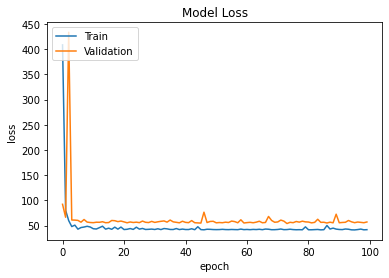

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

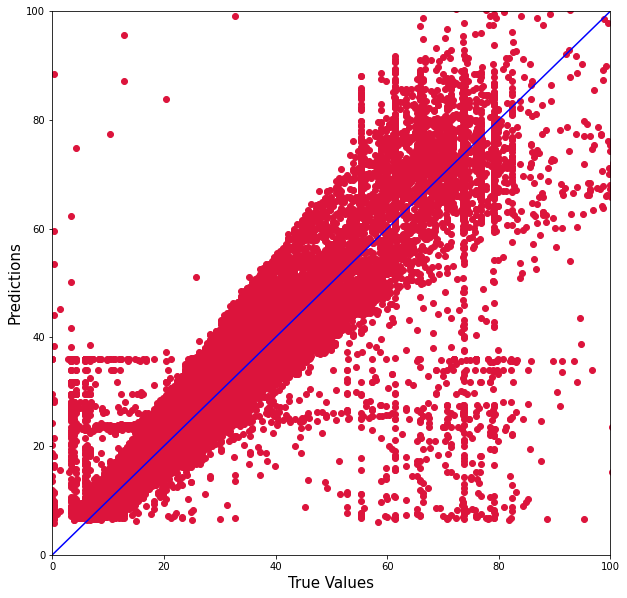

In [7]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [8]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 737us/step - loss: 39.7204 - mae: 2.5013 - mse: 39.7204


[39.72037124633789, 2.5012545585632324, 39.72037124633789]

<h2> 2 Hidden Layers, MSE, 32 Input, 64 Hidden </h2>

In [9]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 550.1828 - mae: 11.0731 - mse: 550.1828 - val_loss: 73.5744 - val_mae: 4.0225 - val_mse: 73.5744
Epoch 2/100
2500/2500 - 3s - loss: 69.5145 - mae: 3.8453 - mse: 69.5145 - val_loss: 638.0774 - val_mae: 16.9543 - val_mse: 638.0774
Epoch 3/100
2500/2500 - 3s - loss: 57.5964 - mae: 3.2408 - mse: 57.5964 - val_loss: 64.1215 - val_mae: 3.3962 - val_mse: 64.1215
Epoch 4/100
2500/2500 - 3s - loss: 63.5145 - mae: 3.1344 - mse: 63.5145 - val_loss: 58.6405 - val_mae: 2.8890 - val_mse: 58.6405
Epoch 5/100
2500/2500 - 3s - loss: 45.0645 - mae: 2.7411 - mse: 45.0645 - val_loss: 56.5656 - val_mae: 3.0125 - val_mse: 56.5656
Epoch 6/100
2500/2500 - 3s - loss: 58.5502 - mae: 3.0456 - mse: 58.5502 - val_loss: 58.4960 - val_mae: 2.9813 - val_mse: 58.4960
Epoch 7/100
2500/2500 - 4s - loss: 54.9415 - mae: 2.8966 - mse: 54.9415 - val_loss: 57.7588 - val_mae: 3.0688 - val_mse: 57.7588
Epoch 8/100
2500/2500 - 4s - loss: 45.7490 - mae: 2.7760 - mse: 45.7490 - val_loss: 58.0214

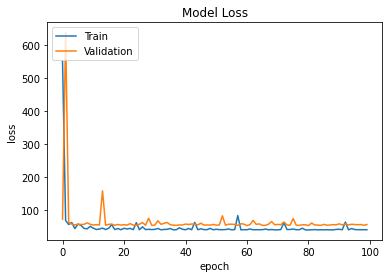

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 3s 835us/step - loss: 40.3591 - mae: 2.6115 - mse: 40.3591


[40.35909652709961, 2.611469030380249, 40.35909652709961]

<h1> 3 Hidden Layers, MSE, 32 Input, 64 Hidden

In [12]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer 
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 385.3770 - mae: 9.8467 - mse: 385.3770 - val_loss: 60.6541 - val_mae: 2.9289 - val_mse: 60.6541
Epoch 2/100
2500/2500 - 4s - loss: 111.7566 - mae: 4.6458 - mse: 111.7566 - val_loss: 57.6107 - val_mae: 3.0794 - val_mse: 57.6107
Epoch 3/100
2500/2500 - 4s - loss: 63.9421 - mae: 3.3364 - mse: 63.9421 - val_loss: 70.9082 - val_mae: 4.0370 - val_mse: 70.9082
Epoch 4/100
2500/2500 - 4s - loss: 56.4513 - mae: 3.1867 - mse: 56.4513 - val_loss: 64.1044 - val_mae: 3.5081 - val_mse: 64.1044
Epoch 5/100
2500/2500 - 4s - loss: 47.4583 - mae: 2.8435 - mse: 47.4583 - val_loss: 57.2504 - val_mae: 2.9658 - val_mse: 57.2504
Epoch 6/100
2500/2500 - 4s - loss: 54.1068 - mae: 2.9905 - mse: 54.1068 - val_loss: 54.5510 - val_mae: 2.8149 - val_mse: 54.5510
Epoch 7/100
2500/2500 - 4s - loss: 46.8240 - mae: 2.8001 - mse: 46.8240 - val_loss: 147.4985 - val_mae: 7.0146 - val_mse: 147.4985
Epoch 8/100
2500/2500 - 4s - loss: 69.6251 - mae: 3.3088 - mse: 69.6251 - val_loss: 58.0193

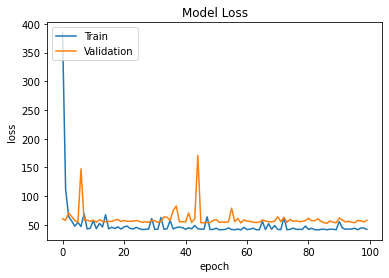

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 765us/step - loss: 40.1584 - mae: 2.5077 - mse: 40.1584


[40.158424377441406, 2.5077478885650635, 40.158424377441406]

<h2> 1 Hidden Layer, MAE, 32 Input, 64 Hidden

In [15]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))# The Input Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 3s - loss: 4.5587 - mae: 4.5587 - mse: 975.5095 - val_loss: 4.6265 - val_mae: 4.6265 - val_mse: 149.2454
Epoch 2/100
2500/2500 - 3s - loss: 2.9904 - mae: 2.9904 - mse: 123.9258 - val_loss: 3.5056 - val_mae: 3.5056 - val_mse: 264.1657
Epoch 3/100
2500/2500 - 3s - loss: 2.8053 - mae: 2.8053 - mse: 81.5756 - val_loss: 2.8921 - val_mae: 2.8921 - val_mse: 68.5698
Epoch 4/100
2500/2500 - 3s - loss: 2.6457 - mae: 2.6457 - mse: 57.9720 - val_loss: 2.9459 - val_mae: 2.9459 - val_mse: 76.2168
Epoch 5/100
2500/2500 - 3s - loss: 2.6588 - mae: 2.6588 - mse: 66.1440 - val_loss: 2.9192 - val_mae: 2.9192 - val_mse: 79.5109
Epoch 6/100
2500/2500 - 3s - loss: 3.0675 - mae: 3.0675 - mse: 127.3997 - val_loss: 3.5456 - val_mae: 3.5456 - val_mse: 294.7294
Epoch 7/100
2500/2500 - 3s - loss: 2.7723 - mae: 2.7723 - mse: 89.1948 - val_loss: 2.7685 - val_mae: 2.7685 - val_mse: 62.8161
Epoch 8/100
2500/2500 - 3s - loss: 2.6519 - mae: 2.6519 - mse: 65.7144 - val_loss: 3.3479 - val_mae: 3.34

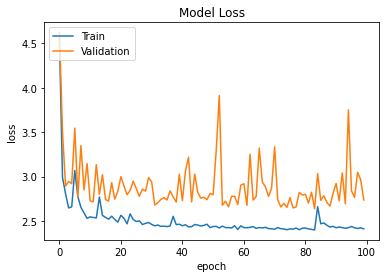

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 3s 803us/step - loss: 2.4037 - mae: 2.4037 - mse: 41.6553


[2.403707265853882, 2.403707265853882, 41.655296325683594]

<h2> 2 Hidden Layers, MAE, 32 Input, 64 Hidden

In [18]:
NN_model = Sequential()

NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 4.9988 - mae: 4.9988 - mse: 1546.6902 - val_loss: 2.8040 - val_mae: 2.8040 - val_mse: 63.8933
Epoch 2/100
2500/2500 - 3s - loss: 2.6756 - mae: 2.6756 - mse: 69.1400 - val_loss: 2.7728 - val_mae: 2.7728 - val_mse: 64.7399
Epoch 3/100
2500/2500 - 3s - loss: 2.6823 - mae: 2.6823 - mse: 86.4187 - val_loss: 2.7320 - val_mae: 2.7320 - val_mse: 63.7955
Epoch 4/100
2500/2500 - 3s - loss: 2.6002 - mae: 2.6002 - mse: 57.7950 - val_loss: 2.8582 - val_mae: 2.8582 - val_mse: 64.2704
Epoch 5/100
2500/2500 - 3s - loss: 2.5237 - mae: 2.5237 - mse: 51.0656 - val_loss: 2.7371 - val_mae: 2.7371 - val_mse: 62.8334
Epoch 6/100
2500/2500 - 4s - loss: 2.5973 - mae: 2.5973 - mse: 77.0835 - val_loss: 2.7689 - val_mae: 2.7689 - val_mse: 64.6203
Epoch 7/100
2500/2500 - 4s - loss: 2.5633 - mae: 2.5633 - mse: 54.1028 - val_loss: 2.9061 - val_mae: 2.9061 - val_mse: 65.5120
Epoch 8/100
2500/2500 - 4s - loss: 2.4831 - mae: 2.4831 - mse: 47.6180 - val_loss: 2.8222 - val_mae: 2.8222 -

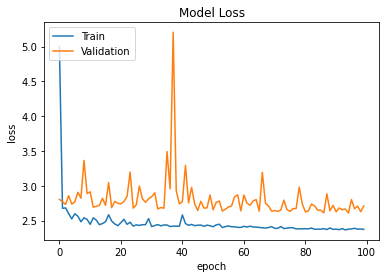

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 3s 920us/step - loss: 2.3810 - mae: 2.3810 - mse: 42.6182


[2.3809642791748047, 2.3809642791748047, 42.6181755065918]

<h2> 3 Hidden Layers, MAE, 32 Input, 64 Hidden

In [21]:
NN_model = Sequential()

NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer 
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 4.6989 - mae: 4.6989 - mse: 1179.0317 - val_loss: 2.9446 - val_mae: 2.9446 - val_mse: 66.3173
Epoch 2/100
2500/2500 - 4s - loss: 2.6198 - mae: 2.6198 - mse: 57.6389 - val_loss: 2.7728 - val_mae: 2.7728 - val_mse: 63.3408
Epoch 3/100
2500/2500 - 4s - loss: 2.6594 - mae: 2.6594 - mse: 53.7656 - val_loss: 3.0413 - val_mae: 3.0413 - val_mse: 67.0213
Epoch 4/100
2500/2500 - 4s - loss: 2.6166 - mae: 2.6166 - mse: 58.8498 - val_loss: 2.9330 - val_mae: 2.9330 - val_mse: 65.4332
Epoch 5/100
2500/2500 - 4s - loss: 2.5597 - mae: 2.5597 - mse: 49.5976 - val_loss: 2.7335 - val_mae: 2.7335 - val_mse: 63.5103
Epoch 6/100
2500/2500 - 4s - loss: 2.5728 - mae: 2.5728 - mse: 71.0151 - val_loss: 3.0610 - val_mae: 3.0610 - val_mse: 67.6594
Epoch 7/100
2500/2500 - 3s - loss: 2.6123 - mae: 2.6123 - mse: 71.1369 - val_loss: 2.8747 - val_mae: 2.8747 - val_mse: 63.9692
Epoch 8/100
2500/2500 - 4s - loss: 2.4836 - mae: 2.4836 - mse: 47.1454 - val_loss: 3.0670 - val_mae: 3.0670 -

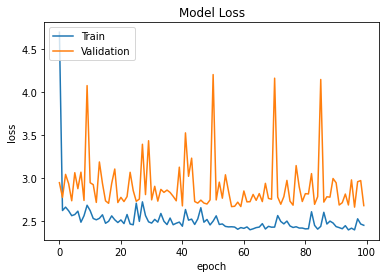

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 3s 1ms/step - loss: 2.3493 - mae: 2.3493 - mse: 41.3388


[2.3492815494537354, 2.3492815494537354, 41.338768005371094]

<h2> 1 Hidden Layer, MSE, 16 Input, 32 Hidden

In [24]:
NN_model = Sequential()

NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 376.1441 - mae: 11.7834 - mse: 376.1441 - val_loss: 90.6958 - val_mae: 5.0265 - val_mse: 90.6958
Epoch 2/100
2500/2500 - 3s - loss: 56.7522 - mae: 3.3543 - mse: 56.7522 - val_loss: 64.3597 - val_mae: 3.0490 - val_mse: 64.3597
Epoch 3/100
2500/2500 - 3s - loss: 47.9736 - mae: 2.7532 - mse: 47.9736 - val_loss: 62.5468 - val_mae: 3.0589 - val_mse: 62.5468
Epoch 4/100
2500/2500 - 3s - loss: 47.8711 - mae: 2.8094 - mse: 47.8711 - val_loss: 58.7653 - val_mae: 2.8808 - val_mse: 58.7653
Epoch 5/100
2500/2500 - 3s - loss: 43.6363 - mae: 2.6239 - mse: 43.6363 - val_loss: 58.0420 - val_mae: 2.9078 - val_mse: 58.0420
Epoch 6/100
2500/2500 - 3s - loss: 50.6954 - mae: 2.8935 - mse: 50.6954 - val_loss: 66.3217 - val_mae: 3.2307 - val_mse: 66.3217
Epoch 7/100
2500/2500 - 3s - loss: 46.2545 - mae: 2.7604 - mse: 46.2545 - val_loss: 57.3969 - val_mae: 2.8256 - val_mse: 57.3969
Epoch 8/100
2500/2500 - 2s - loss: 44.7629 - mae: 2.6744 - mse: 44.7629 - val_loss: 57.1882 - 

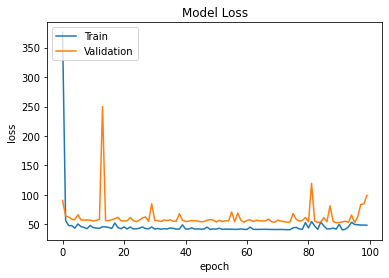

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

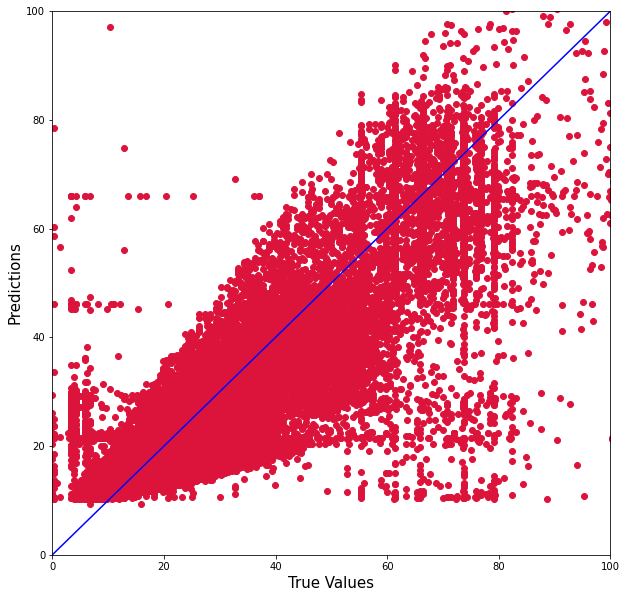

In [26]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [27]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 714us/step - loss: 58.6264 - mae: 4.0200 - mse: 58.6264


[58.626426696777344, 4.020031929016113, 58.626426696777344]

<h2> 2 Hidden Layers, MSE, 16 Input, 32 Hidden

In [28]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer 
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x,y,epochs=100,verbose=2,validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 399.9496 - mae: 12.1205 - mse: 399.9496 - val_loss: 346.6789 - val_mae: 5.7450 - val_mse: 346.6789
Epoch 2/100
2500/2500 - 3s - loss: 58.8080 - mae: 3.6264 - mse: 58.8080 - val_loss: 66.2913 - val_mae: 3.1384 - val_mse: 66.2913
Epoch 3/100
2500/2500 - 3s - loss: 64.9197 - mae: 3.3709 - mse: 64.9197 - val_loss: 76.9059 - val_mae: 3.7963 - val_mse: 76.9059
Epoch 4/100
2500/2500 - 3s - loss: 47.0468 - mae: 2.7008 - mse: 47.0468 - val_loss: 62.1392 - val_mae: 2.8017 - val_mse: 62.1392
Epoch 5/100
2500/2500 - 3s - loss: 55.0205 - mae: 2.9420 - mse: 55.0205 - val_loss: 60.4988 - val_mae: 2.8842 - val_mse: 60.4988
Epoch 6/100
2500/2500 - 3s - loss: 44.6197 - mae: 2.6705 - mse: 44.6197 - val_loss: 75.7422 - val_mae: 3.5654 - val_mse: 75.7422
Epoch 7/100
2500/2500 - 3s - loss: 59.6913 - mae: 2.9385 - mse: 59.6913 - val_loss: 59.4178 - val_mae: 3.3077 - val_mse: 59.4178
Epoch 8/100
2500/2500 - 3s - loss: 42.4273 - mae: 2.5809 - mse: 42.4273 - val_loss: 57.2325 

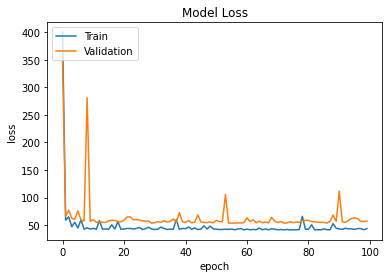

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 706us/step - loss: 40.3122 - mae: 2.6090 - mse: 40.3122


[40.31221389770508, 2.608995199203491, 40.31221389770508]

<h2> 3 Hidden Layers, MSE, 16 Input, 32 Hidden

In [31]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x,y,epochs=100,verbose=2,validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 536.3868 - mae: 14.8854 - mse: 536.3868 - val_loss: 425.7384 - val_mae: 13.3244 - val_mse: 425.7384
Epoch 2/100
2500/2500 - 3s - loss: 107.4793 - mae: 5.6576 - mse: 107.4793 - val_loss: 70.1026 - val_mae: 3.7146 - val_mse: 70.1026
Epoch 3/100
2500/2500 - 3s - loss: 56.4435 - mae: 3.6337 - mse: 56.4435 - val_loss: 66.9978 - val_mae: 3.6237 - val_mse: 66.9978
Epoch 4/100
2500/2500 - 3s - loss: 55.0097 - mae: 3.4939 - mse: 55.0097 - val_loss: 63.3458 - val_mae: 3.2039 - val_mse: 63.3458
Epoch 5/100
2500/2500 - 3s - loss: 58.0750 - mae: 3.3591 - mse: 58.0750 - val_loss: 69.0104 - val_mae: 3.7818 - val_mse: 69.0104
Epoch 6/100
2500/2500 - 3s - loss: 59.5520 - mae: 3.2906 - mse: 59.5520 - val_loss: 57.7108 - val_mae: 2.9544 - val_mse: 57.7108
Epoch 7/100
2500/2500 - 3s - loss: 54.7188 - mae: 2.9608 - mse: 54.7188 - val_loss: 66.5306 - val_mae: 3.4146 - val_mse: 66.5306
Epoch 8/100
2500/2500 - 3s - loss: 48.1636 - mae: 2.7957 - mse: 48.1636 - val_loss: 57.45

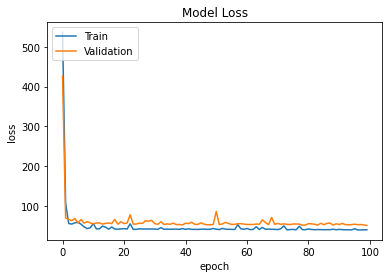

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

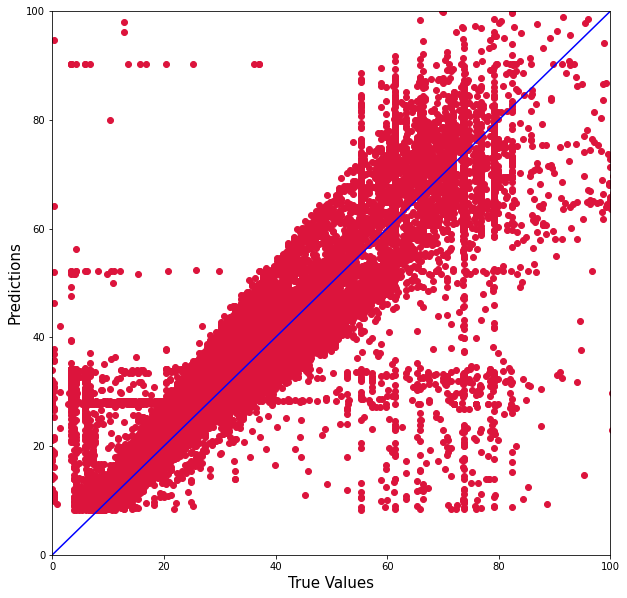

In [33]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [34]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 744us/step - loss: 39.0712 - mae: 2.4286 - mse: 39.0712


[39.071224212646484, 2.4285926818847656, 39.071224212646484]

<h2> 1 Hidden Layers, MAE, 16 Input, 32 Hidden

In [35]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x,y,epochs=100,verbose=2,validation_split=0.2)


Epoch 1/100
2500/2500 - 3s - loss: 5.3916 - mae: 5.3916 - mse: 1974.2882 - val_loss: 2.8354 - val_mae: 2.8354 - val_mse: 65.1647
Epoch 2/100
2500/2500 - 3s - loss: 2.8230 - mae: 2.8230 - mse: 85.0842 - val_loss: 3.3299 - val_mae: 3.3299 - val_mse: 92.9575
Epoch 3/100
2500/2500 - 2s - loss: 2.7154 - mae: 2.7154 - mse: 75.8318 - val_loss: 3.0551 - val_mae: 3.0551 - val_mse: 67.0873
Epoch 4/100
2500/2500 - 3s - loss: 2.6513 - mae: 2.6513 - mse: 72.4020 - val_loss: 2.9336 - val_mae: 2.9336 - val_mse: 73.8610
Epoch 5/100
2500/2500 - 2s - loss: 2.6067 - mae: 2.6067 - mse: 67.5689 - val_loss: 2.8051 - val_mae: 2.8051 - val_mse: 65.7428
Epoch 6/100
2500/2500 - 3s - loss: 2.6214 - mae: 2.6214 - mse: 70.7293 - val_loss: 3.0789 - val_mae: 3.0789 - val_mse: 67.6840
Epoch 7/100
2500/2500 - 2s - loss: 2.5517 - mae: 2.5517 - mse: 57.2386 - val_loss: 3.1209 - val_mae: 3.1209 - val_mse: 88.8195
Epoch 8/100
2500/2500 - 3s - loss: 2.5575 - mae: 2.5575 - mse: 62.0066 - val_loss: 2.8796 - val_mae: 2.8796 -

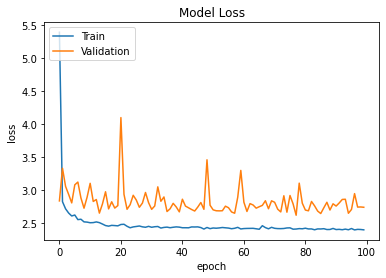

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

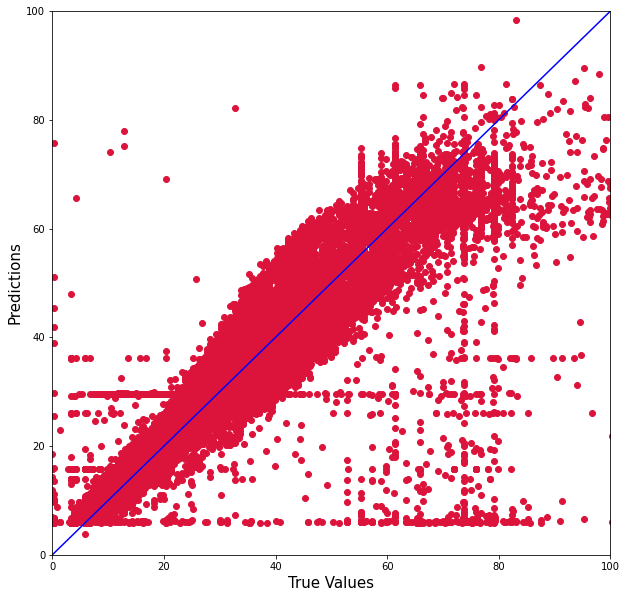

In [37]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [38]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 3s 909us/step - loss: 2.3877 - mae: 2.3877 - mse: 43.9744


[2.387697696685791, 2.387697696685791, 43.974365234375]